<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo V: Deep Learning </h1>
<h2 align='center'>  Perceptron Multicapas </h2> 

---

# Aspectos Teóricos

## Introducción

**El perceptrón multicapas** es una generalización del perceptrón simple visto previamente. Surge como consecuencia de las limitaciones de dicha arquitectura en lo referente a la separabilidad no lineal. en el año 1969, Minsky y Papert mostraron que la combinación de varios perceptrones simples, podia resultar una solución adecuada para tratar ciertos problemas no lineales. Sin embargo, los autores no presentaron una solución al problema de cómo adaptar los pesos de la capa de entrada a la capa de salida. No obstante esta combinación sirvió como base para estudios posteriores realizados Rumenlhart, Hitson y Willians en 1986. Estos autores presentaron una manera de retropropagar los errores medidos en la salida de la red hacia las neuronas ocultas, dando lugar a la **regla delta generalizada** para funciones no lineales y redes multicapas.

El Perceptrón Multicapas tiene la habilidad de aprender a partir de un conjunto de datos de ejemplos, aproximar relaciones no lineales, filtrar ruido e los datos, etc. Esto hace que sea un modelo adecuado para abordar problemas reales, sin que esto indique que sean los mejores aproximadores universales. Serán las consideraciones prácticas de cada problema las que determinen la elección de un aproximador u otro. Dentro del marco de las redes neuronales, el Percetrón multicapas es una de las arquitecturas más utilizadas en la resolución de problemas.

## Arquitectura del Perceptrón multicapas

La arquitectura del Perceptrón multicapas se caracteriza porque tiene sus neuronas agrupadas en capas de diferentes niveles. Cada una de las capas está formada por un conjunto de neuronas y se distinguen tres tipos de capas diferentes: **La capa de entrada, las capas ocultas y la capa de salida**

<img src="imagenes/perceptron_multicapas.jpg" alt="logo" style="width: 400px;"/>

Las conexiones del Perceptrón multicapas siempre están dirigidas hacia adelante, es decir, las neuronas de una capa se conectan con las neuronas de la capa siguiente, de allí que reciban también el nombre de redes alimentadas hacia adelante o redes "feedforward". Las conexiones entre las neuronas llevan asociado un número real, llamado peso dela conexión. Todas las neuronas de la red llevan también asociado un umbral, que en el Perceptrón multicapas suele tratarse como una conexión más a la neurona, cuya entrada es constante e igual a 1.

## Propagación de los patrones de entrada

El Perceptrón multicapas define una relación entre todas las variables de entrada y las variables de salida de la red. Esta relación se obtiene propagando hacia adelante los valores de la variable de entrada. Para ello, cada neurona de la red procesa la información recibida por sus entradas y produce una respuesta o activación que se propaga,a través de las conexiones correspondientes, hacia las neuronas de la siguiente capa.

  * **Activaciones de la capa de entrada**
  $$a_i^1=x_i, \mbox{ para } i=1,2,\ldots,n_1$$
  donde $n_1$ es el número de neuronas en la capa de entrada
  
  * **Activaciones de las capas ocultas**
  $$a_i^c=f\Bigg(\sum_{j=1}^{n_{c-1}}w_{ji}^{c-1}a_j^{c-1}+u_i^c\Bigg), \quad \mbox{para } i=1,2,\ldots,n_c \mbox{ y } c=1,2,\ldots,C-1 $$ 
  donde $a_{j}^{c-1}$ son las activaciones de las neuronas en la capa c-1
  
  * **Activaciones de las neuronas de salida**
  
  $$y_{i}=a_{i}^{C}=f\Bigg(\sum_{j=1}^{n_{C-1}}w_{ji}^{C-1}a_j^{C-1}+u_i^C\Bigg), \quad \mbox{para } i=1,2,\ldots,n_C$$
  donde $Y=\{y_1,y_2,\ldots,y_{n_C}\}$
  
  
  La función $f$ es la llamada **función de activación**. Para el Perceptrón multicapas, las funciones de activación más utilizadas son la **función sigmoide** y la **función tangente hiperbólica**. Dichas funciones poseen como imagen un rango continuo de valores dentro de los intervalos [0,1] y [-1,1], respectivamente, y vienen dadas por las siguientes expresiones:
  * Función sigmoide:
  $$f_{1}(x)=\frac{1}{1+e^{-x}}$$
  * Función tangente hiperbólica:
  $$f_{2}(x)=\frac{1-e^{-x}}{1+e^{-x}}$$

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import time

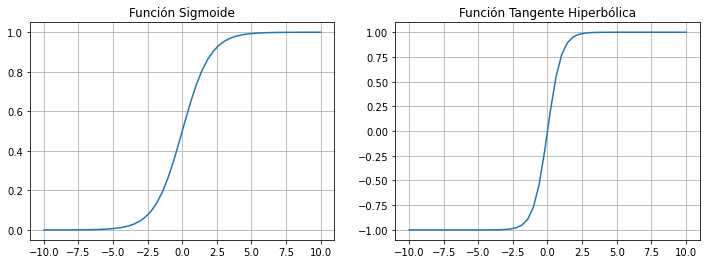

In [14]:
plt.figure(figsize=(12,4))
x=np.linspace(-10,10,50)
plt.subplot(1,2,1)
plt.plot(x,1/(1+np.e**(-x)))
plt.title('Función Sigmoide')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,np.tanh(x))
plt.title('Función Tangente Hiperbólica')
plt.grid()
plt.show()

## Algoritmo de retropropagación

La regla o algoritmo de aprendizaje es el mecanismo mediante el cual se van adaptando y modificando todos los parámetros de la red. En el caso del Perceptrón multicapas se trata de un algoritmo de **aprendizaje supervisado**; es decir, la modificación de los parámetros se realiza para que la salida de la red sea lo más próxima posible a la salida proporcionada por el supervisor o salida deseada.

Puesto que el objetivo es que la salida de la red sea lo más próxima posible a la salida deseada, el aprendizaje de la red se formula como un problema de minimización del siguiente modo:

$$Min_W E$$
siendo $W$ el conjunto de parámetros de la red -pesos y umbrales- y $E$ una función error que evalúa la diferencia entre las salidas de la red y las salidas deseadas. En la mayor parte de los casos, la función error se define como:
$$E=\frac{1}{N}\sum_{n=1}^{N}e(n)$$
donde $N$ es el número de patrones o muestras y $e(n)$ es el error cometido por la red para el patrón $n$, dado por:
$$e(n)=\frac{1}{2}\sum_{n=1}^{n_C}(s_i(n)-y_i(n))^2$$

siendo $Y(n)=(y_{1}(n),y_{2}(n),\ldots,y_{n_{C}})$ y $S(n)=(s_{1}(n),s_{2}(n),\ldots,s_{n_{C}})$  los vectores de salidas de la red y salidas deseadas para el patrón $n$, respectivamente.

## Regla delta generalizada

Para el desarrollo de la regla delta generalizada es necesario distingir dos casos: Uno para los pesos de la capa oculta $C-1$ a la capa de salida y para los umbrales de las neuronas de salida, y otro para el resto de los pesos y umbrales de la red, pues la modificación de estos parámetros son diferentes.


### **1.  Pesos de la capa oculta $C-1$ a la capa de salida y umbrales de la capa de salida**
* ####  Descenso del gradiente para actualizacion de pesos
$$w_{ji}^{C-1}(n)=w_{ji}^{C-1}(n-1)-\frac{\partial e(n)}{\partial w_{ji}^{C-1}}$$

* ####  Derivada parcial del error $e(n)$ con respecto al peso $w_{ji}$ de la capa C-1
 $$\frac{\partial e(n)}{\partial w_{ji}^{C-1}}=-(s_{i}(n)-y_{i}(n))\frac{\partial y_{i}}{\partial w_{ji}^{C-1}}$$

* ####  Aplicación de la **regla de la cadena** de la neurona de salida $y_{i}(n)$ respecto al peso  $w_{ji}^{C-1}$
$$\frac{\partial y_{i}(n)}{\partial w_{ji}^{C-1}}=f'\Bigg(\sum_{j=1}^{n_{C-1}}w_{ji}^{C-1}a_{j}^{C-1}+u_{j}^{C}\Bigg)a_{j}^{C-1}(n)$$

* ####  Definición del término $\delta_{i}^{C}(n)$ asociado a la neurona $i$ de la capa de salida $C$ y al patrón $n$
$$\delta_{i}^{C}(n)=-(s_{i}(n)-y_{i}(n))\frac{\partial y_{i}}{\partial w_{ji}^{C-1}}$$
$$w_{ji}^{C-1}(n)=w_{ji}^{C-1}(n-1)+\alpha \delta_{i}^{C}(n)a_{j}^{C-1}(n)$$
  
### **2. Pesos de la capa $c$ a la capa $c+1$ y umbrales de las neuronas de la capa $c+1$ para $c=1,2,\ldots,n_C$**

$$w_{ji}^{C-2}(n)=w_{ji}^{C-2}(n-1)-\frac{\partial e(n)}{\partial w_{ji}^{C-2}}$$

$$\frac{\partial e(n)}{\partial w_{ji}^{C-2}}=-\sum_{i=1}^{n_{C}}(s_{i}(n)-y_{i}(n))\frac{\partial y_{i}}{\partial w_{ji}^{C-2}}$$

$$\frac{\partial y_{i}(n)}{\partial w_{ji}^{C-2}}=f'\Bigg(\sum_{j=1}^{n_{C-1}}w_{ji}^{C-1}a_{j}^{C-1}+u_{j}^{C}\Bigg)w_{ji}^{C-1}(n)\frac{\partial a_{j}^{C-1}(n)}{\partial w_{ji}^{C-2}}$$


## Proceso de aprendizaje del Perceptrón multicapas

Los pasos que componen el proceso de aprendizajedel Perceptron multicapas son los siguientes:
1. Se inicializan los pesos y umbrales de la red. Generalmente, esta inicialización es aleatoria y con valores alrededor del cero.
2. Se toma un patrón $n$ del conjunto de entrenamiento, $(X(n),S(n))$, y se propaga hacia la salida de la red el vector de entrada $X(n)$, obteniendo así la respuesta de la red para dicho vector, $Y(n)$.
3. Se evalúa el error cuadrático cometido por la red para el patrón $n$ utilizando la expresión anterior para $e(n)$.
4. Se aplica la regla delta generalizada para modificar los pesos y umbrales de la red. Para ello se siguen los siguientes pasos:

    4.1. Se calculan los valores $\delta$ para todas las neuronas de la capa de salida.
    
    4.2. Se calculan los valores $\delta$ para el resto de las neuronas en la red, empezando desde la última capa oculta y retropropagando dichos valores hacia la capa de entrada.
    
    4.3. Se modifican pesos y umbrales de la red utilizando las expresiones anteriors correspondientes.
    
5. Se repiten los pasos 2,3 y 4 para todos los patrones de entrenamiento completando así un iteración o ciclo de aprendizaje.
6.  Se evalúa el error total $E$ cometido por la red. Dicho error también recibe el nombre de *error de entrenamiento*, puesse calcula utilizando los patrones de entrenamiento.
7. Se repiten los pasos 2,3,4,5,y 6 hasta alcanzar un mínimo del error de entrenamiento, para lo cual se realizan $m$ ciclos de aprendizaje.

# Implementación

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse

In [16]:
# Se crea la clase capa
class capa():
    def __init__(self,n_conex,n_neur):
        self.W=2*np.random.rand(n_conex,n_neur)-1
        self.b=2*np.random.rand(1,n_neur)-1

# Se crea la clase perceptrón
        
class perceptron():
    """
    topologia: Nro de neuronas por capas
    pesos[i]: Pesos que conectan con la capa i
    alpha: tasa de aprendizaje.
    f: función de activacion decada capa
    a: activaciones de cada neurona    
    """
    def __init__(self,topologia):
        self.topo=topologia
        self.pesos=self.arquitectura(topologia)        

    def arquitectura(self,topologia):
        aux=[]
        for i, valor in enumerate(topologia[:-1]):
            aux.append(capa(topologia[i],topologia[i+1]))
        return aux
    
    def f(self,x): # Función de transición
        #return 1/(1+np.e**(-x))
        return np.tanh(x)
    
    def Df(self,x): # Derivada de la función de transición
        #return self.f(x)*(1-self.f(x))
        return 1-(self.f(x))**2
    
    def entrenamiento(self,X,Y,alpha):
        #Fase 1: Propagación de los valores de entrada
        
        a=[]
        z=[]
        a.append(X)
        
        for i in range(len(self.pesos)):
            z.append(a[i]@self.pesos[i].W+self.pesos[i].b)
            a.append(self.f(z[-1]))
            
        
        #Fase 2: Retropropagación del error
        
        delta=[]
        for i in reversed(range(1,len(a))):
            if i==len(a)-1:
                # propagación última capa
                delta.insert(0,-(Y-a[i])*self.Df(z[i-1]))
            else:
                # propagación capas intermedias
                delta.insert(0,delta[0]@self.pesos[i].W.T*self.Df(z[i-1]))
            
        #Fase 3: Descenso del gradiente (corrección de pesos)
            
        for i in range(len(self.pesos)):   
            self.pesos[i].W = self.pesos[i].W-alpha*a[i].T@delta[i]
            self.pesos[i].b = self.pesos[i].b-alpha*np.mean(delta[i],axis=0,keepdims=True)        
    
    def salida(self,X):
        a=[]
        z=[]
        a.append(X)
        
        for i in range(len(self.pesos)):
            z.append(a[i]@self.pesos[i].W+self.pesos[i].b)
            a.append(self.f(z[-1]))
            
        return a[-1]        
           

# Ejemplos
___

# Compuertas Lógicas

### Se crea el dataset

In [73]:
# DataSet
# Puede quitar los comentarios del conjunto de datos que quiera experimentar. No olvide comentar los que no va a usar
#****************** AND **********************************
#X=np.array([(-1,-1),(-1,1),(1,-1),(1,1)])
#Y=np.array([-1,-1,-1,1])

#****************** OR **********************************
#X=np.array([(-1,-1),(-1,1),(1,-1),(1,1)])
#Y=np.array([-1,1,1,1])

#****************** XOR **********************************
#X=np.array([(-1,-1),(-1,1),(1,-1),(1,1)])
#Y=np.array([1,-1,-1,1])

from sklearn.datasets import make_circles
X,Y=make_circles(500,factor=0.25,noise=0.1)
Y=np.where(Y==0,-1,1)
Y=Y[:,np.newaxis]

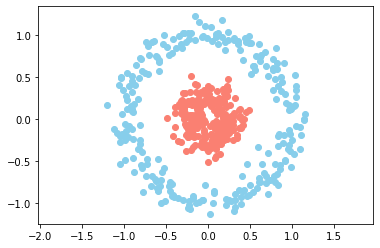

In [74]:
plt.scatter(X[Y[:,0]==-1,0],X[Y[:,0]==-1,1],c="skyblue");
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon");
plt.axis('equal')
plt.show()

In [66]:
X

array([[-1, -1],
       [-1,  1],
       [ 1, -1],
       [ 1,  1]])

In [67]:
Y

array([[ 1],
       [-1],
       [-1],
       [ 1]])

### Se define la arquitectura de la red

In [75]:
topologia = [2,4,2,4,1]
red = perceptron(topologia)

## Se comienza el entrenamiento de la red

In [76]:
ciclos = 200

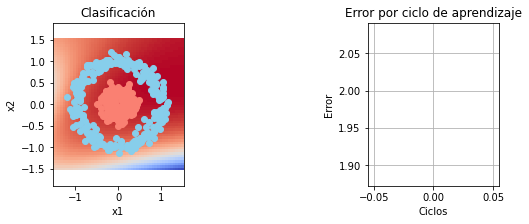

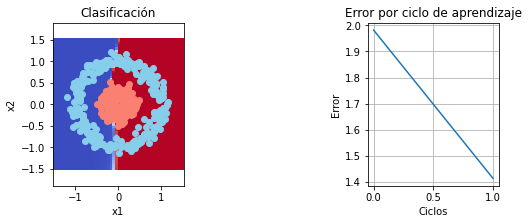

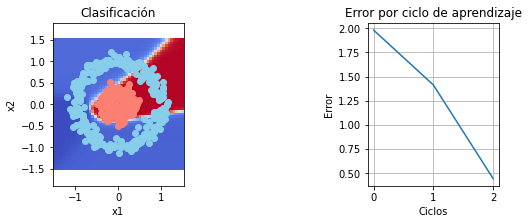

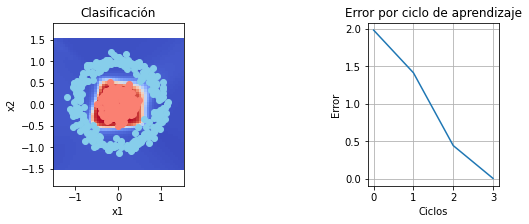

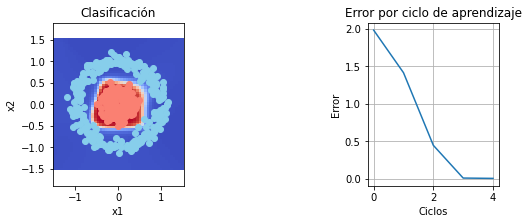

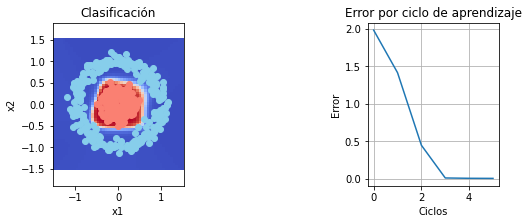

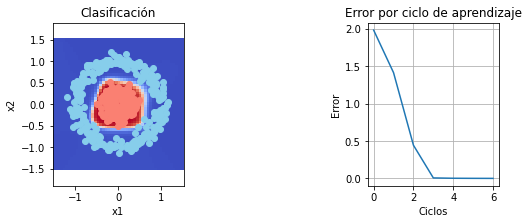

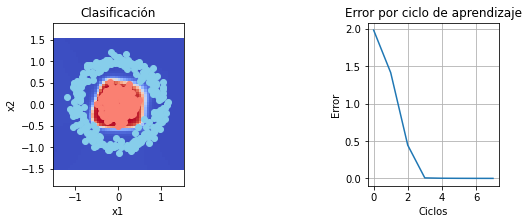

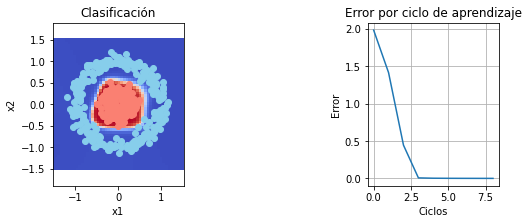

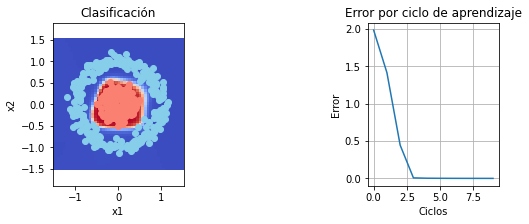

In [77]:
_x0 = np.linspace(-1.5,1.5,50)
_x1 = np.linspace(-1.5,1.5,50)
error=[]

for i in range(ciclos):
    #Entrenamos la red:
    red.entrenamiento(X,Y,0.008)
    if i % 20==0:
        resultado=red.salida(X)
        error.append(np.mean((resultado-Y)**2))
            
        Z=np.zeros((50,50))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                Z[i0,i1]=red.salida(np.array([[x0,x1]]))[0][0]
               
        plt.figure(figsize=(8,3))
        plt.subplot(1,3,1) 
        plt.pcolormesh(_x0,_x1,Z,cmap="coolwarm",shading='auto')
        plt.axis("equal")
        plt.scatter(X[Y[:,0]==-1,0],X[Y[:,0]==-1,1],c="skyblue");
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon");
        plt.title('Clasificación')
        plt.xlabel('x1')
        plt.ylabel('x2')
        
        plt.subplot(1,3,3)  
        
        plt.plot(range(len(error)),error)
        plt.title('Error por ciclo de aprendizaje')
        plt.xlabel('Ciclos')
        plt.ylabel('Error')
        #clear_output(wait=True)
        plt.grid()
        plt.show()        
        time.sleep(0.5)  

___
# Reconocimiento de dígitos manuscritos

In [110]:
#Directorio de trabajo
import os
from keras.datasets import mnist
from keras.utils import to_categorical
directorio = os.getcwd()

In [294]:
(x_train, y_train),(x_test,y_test) = mnist.load_data(path = directorio + '\datos\mnist.npz')

In [295]:
x_train.shape

(60000, 28, 28)

In [296]:
y_train[0]

5

## Preprocesamiento

In [297]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28* 28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [298]:
# Convertimos en un vector de una dimensión
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [299]:
y_test.shape

(10000, 10)

In [301]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [190]:
topologia = [784,128,10]
red = perceptron(topologia)

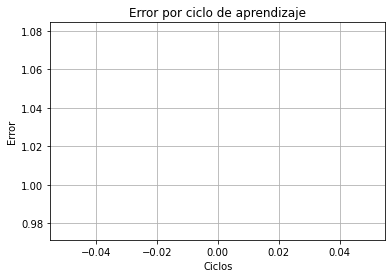

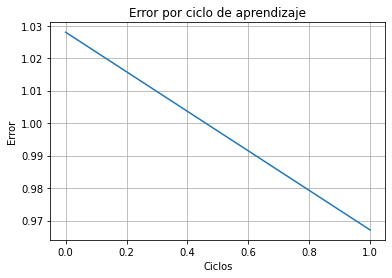

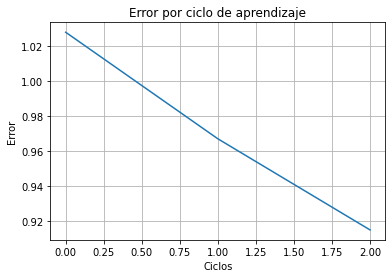

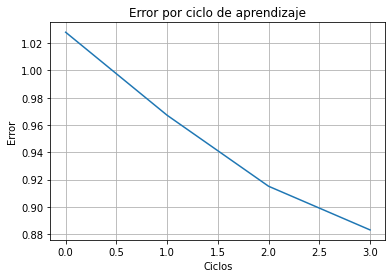

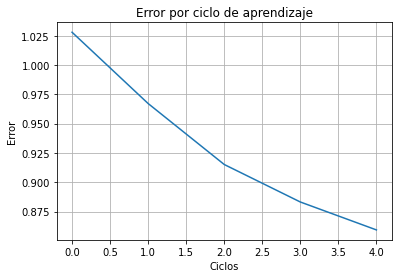

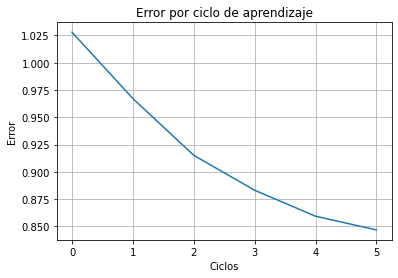

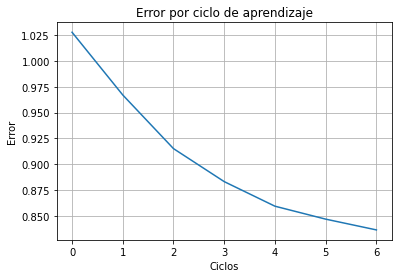

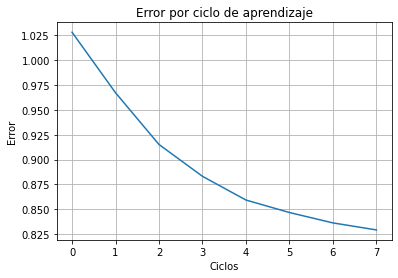

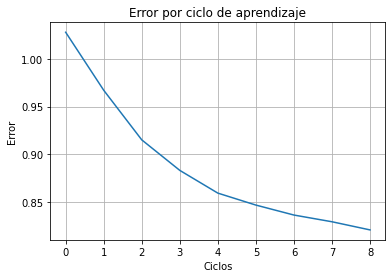

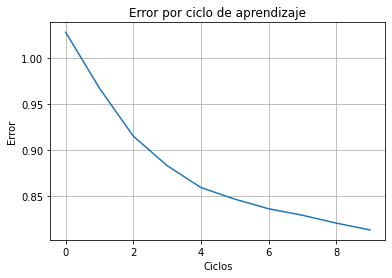

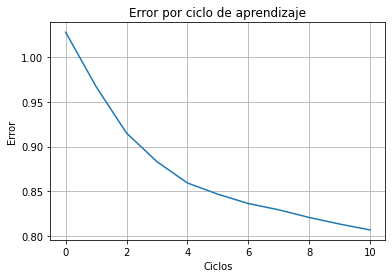

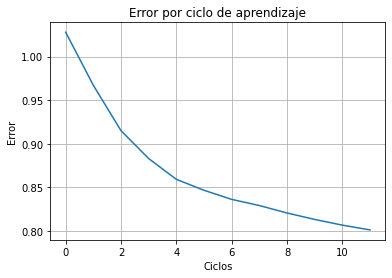

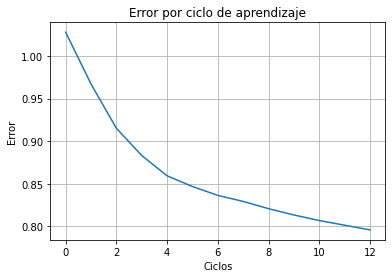

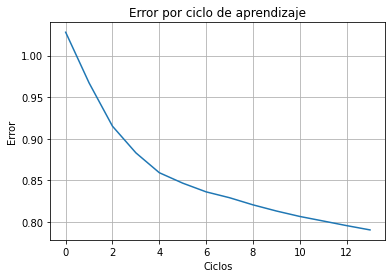

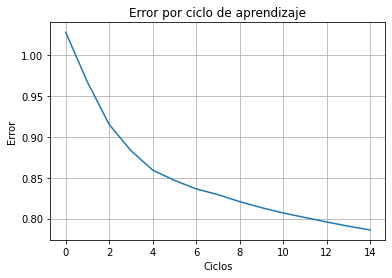

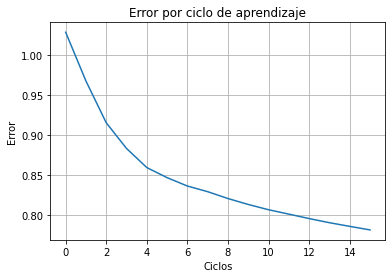

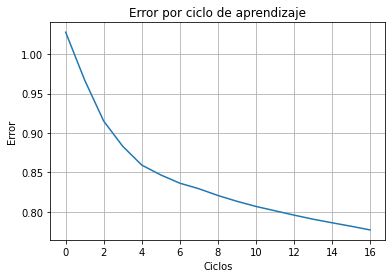

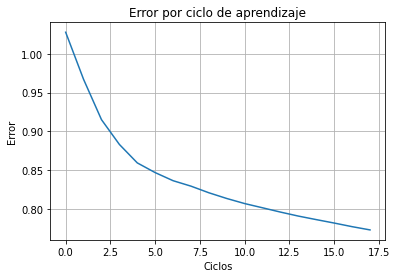

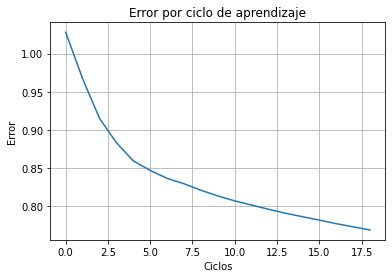

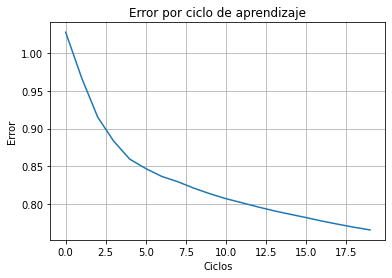

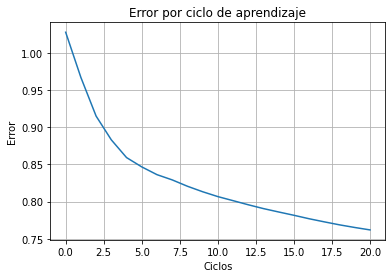

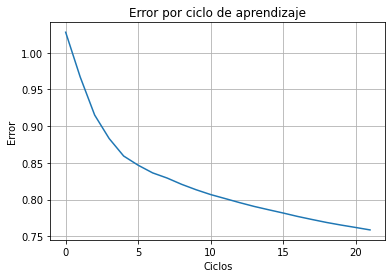

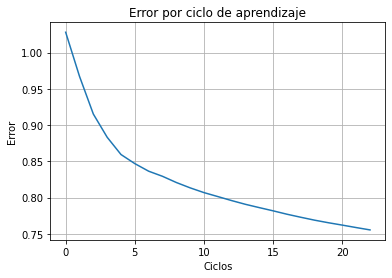

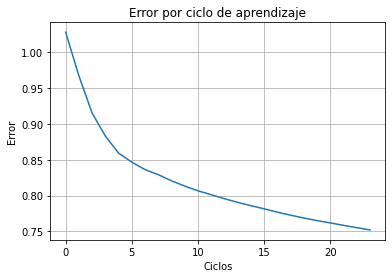

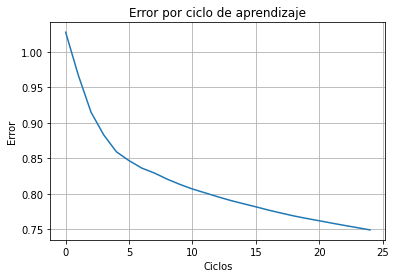

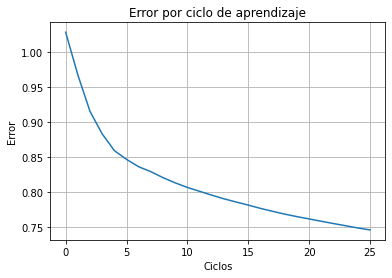

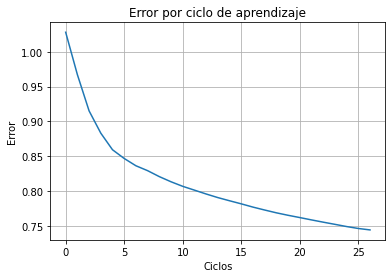

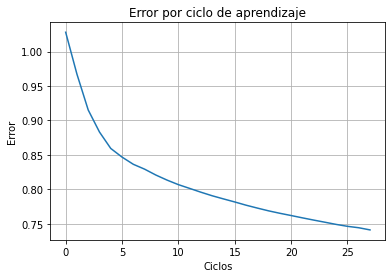

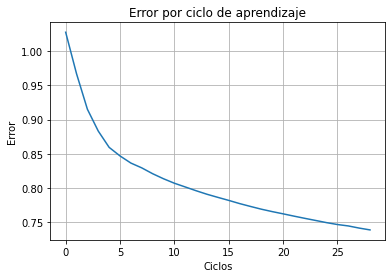

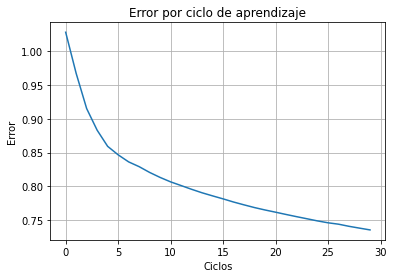

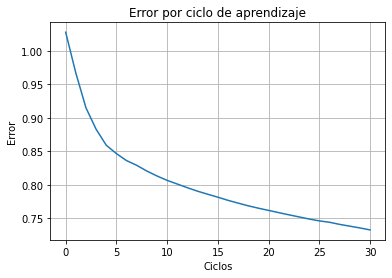

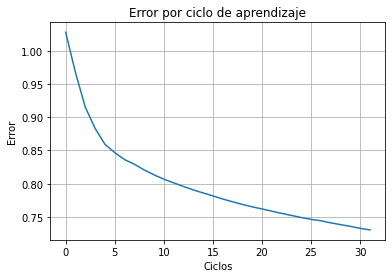

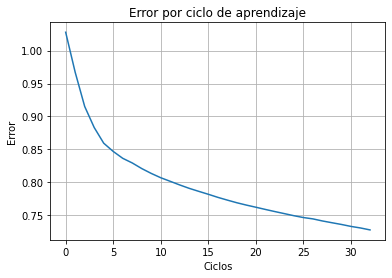

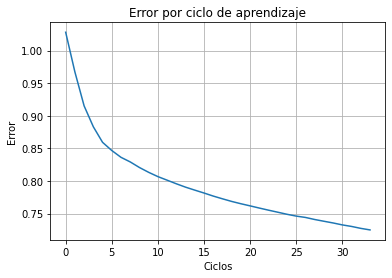

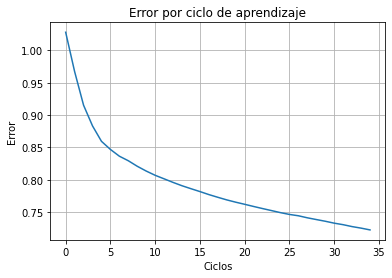

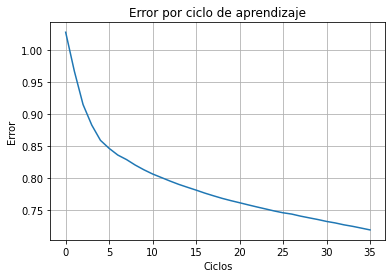

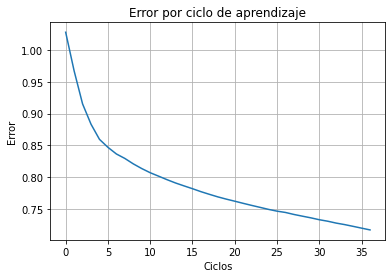

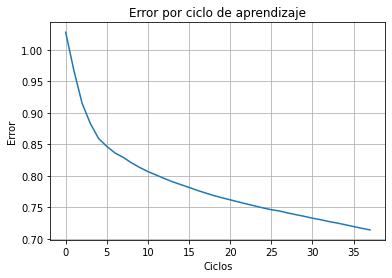

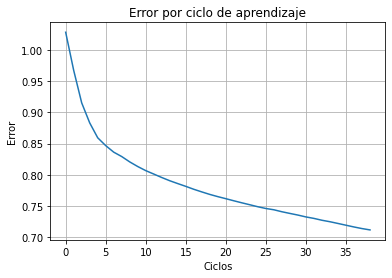

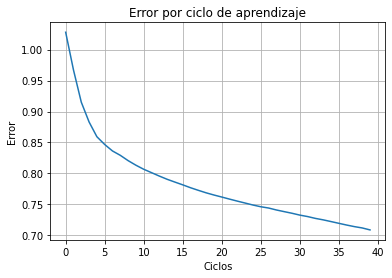

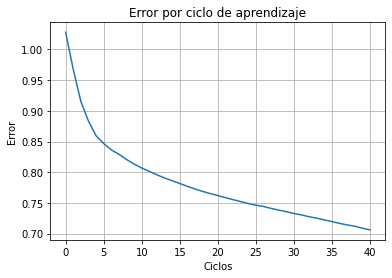

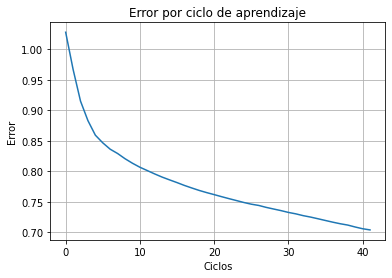

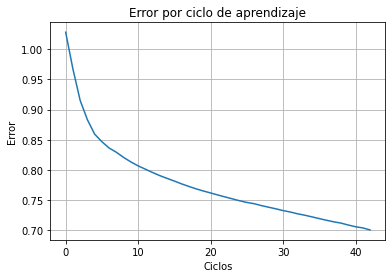

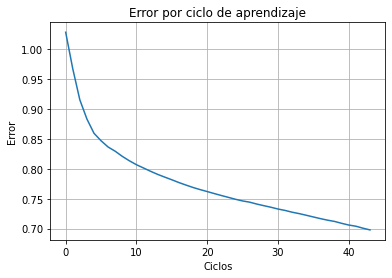

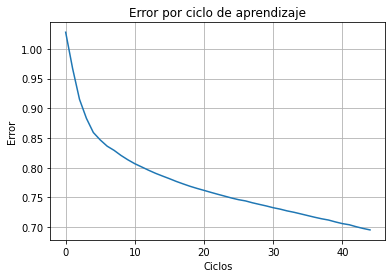

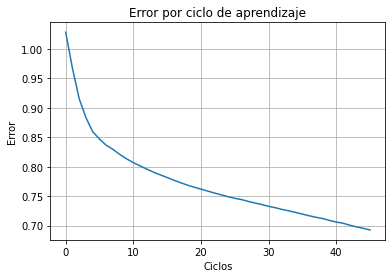

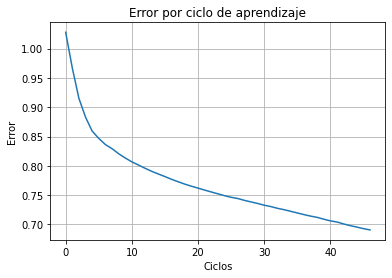

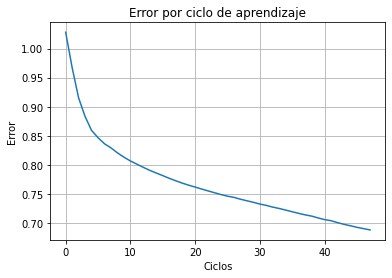

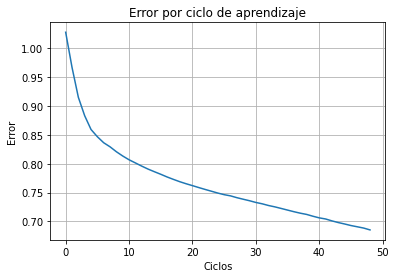

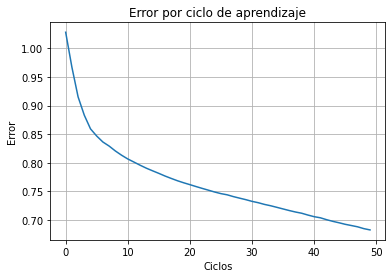

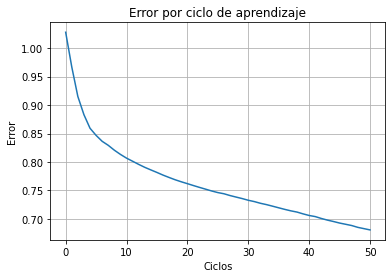

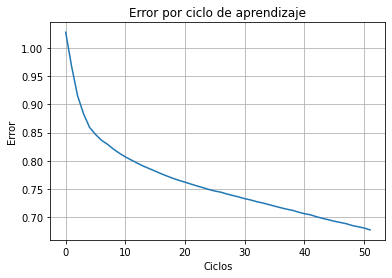

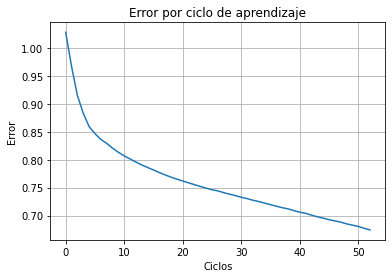

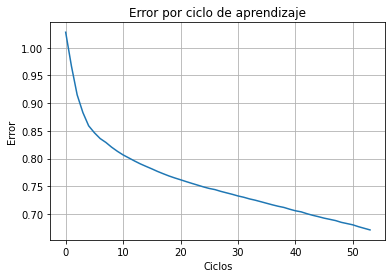

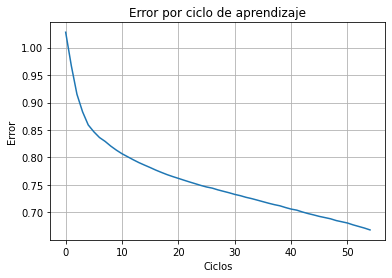

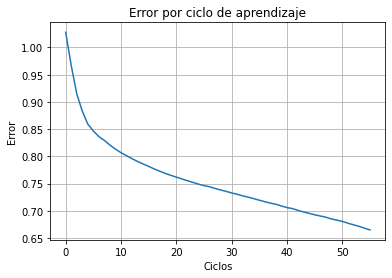

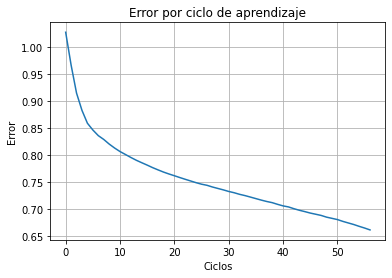

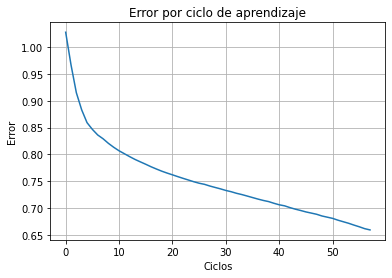

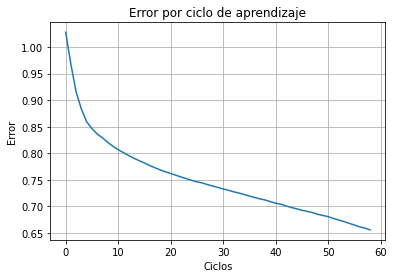

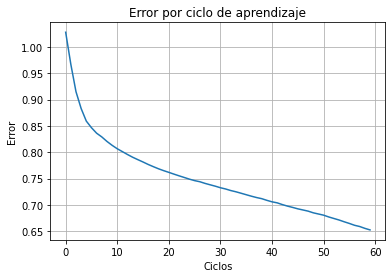

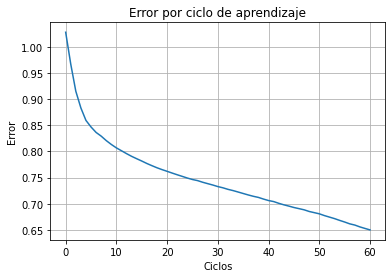

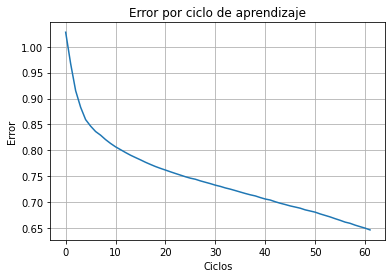

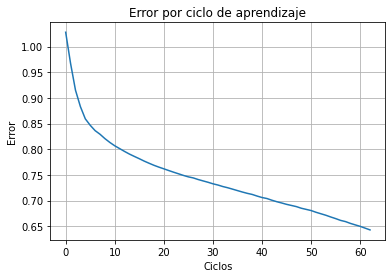

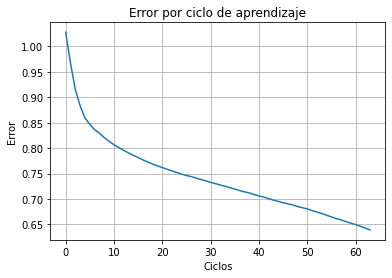

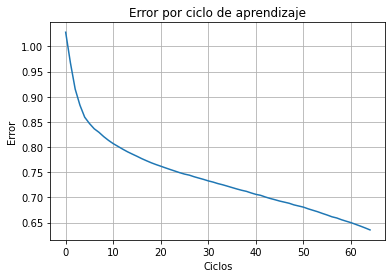

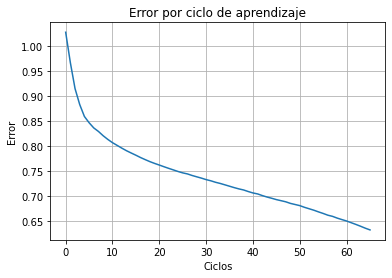

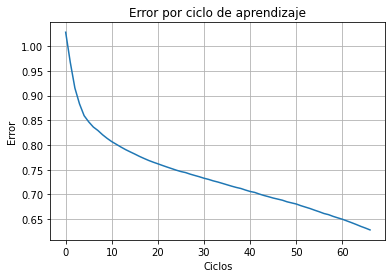

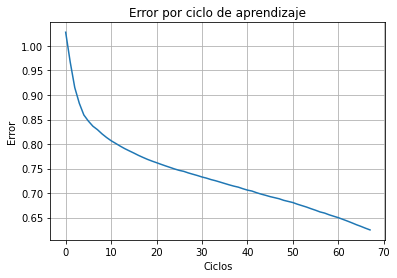

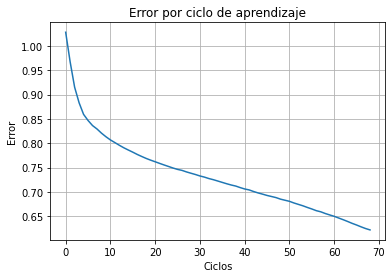

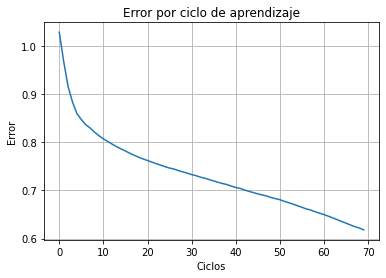

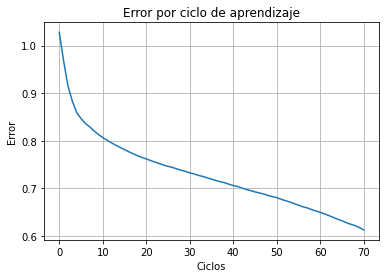

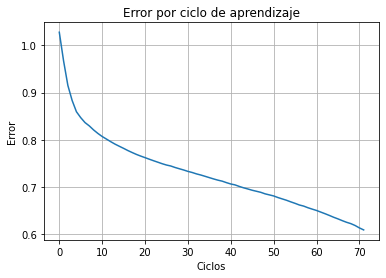

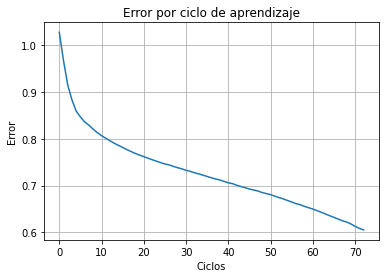

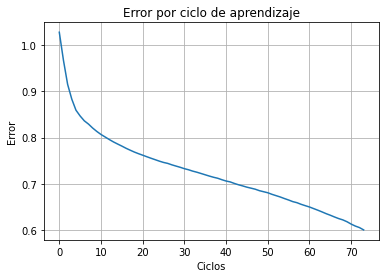

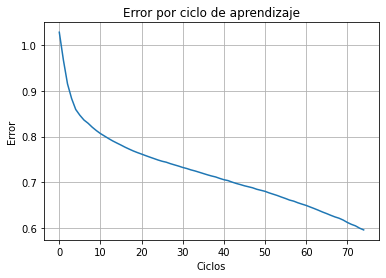

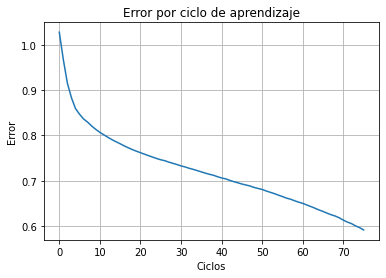

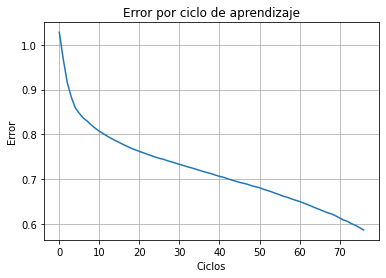

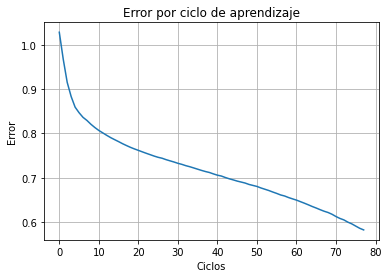

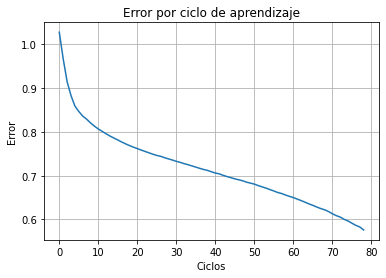

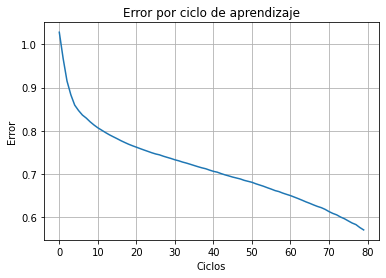

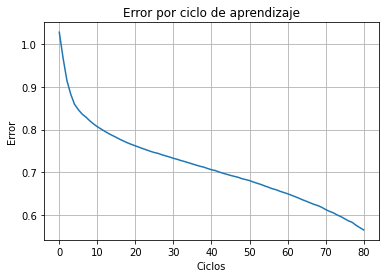

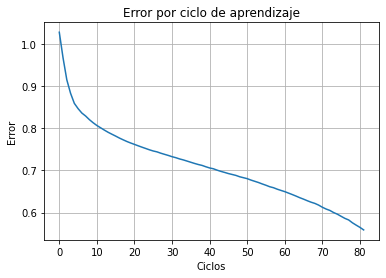

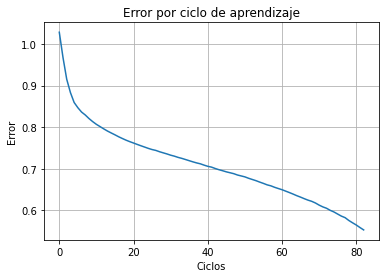

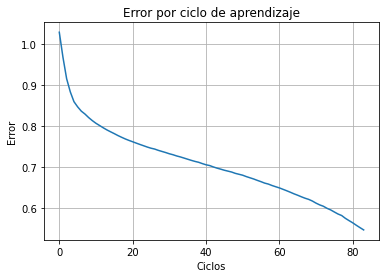

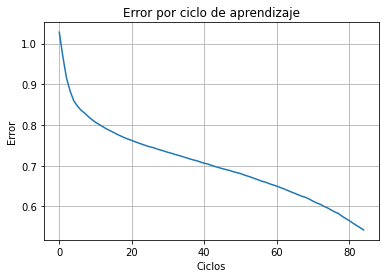

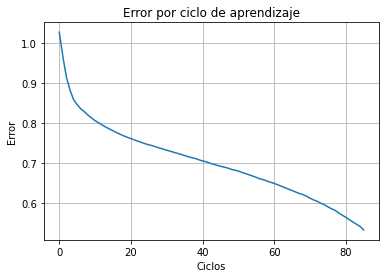

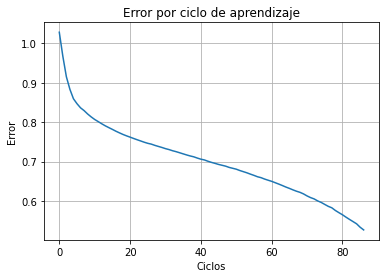

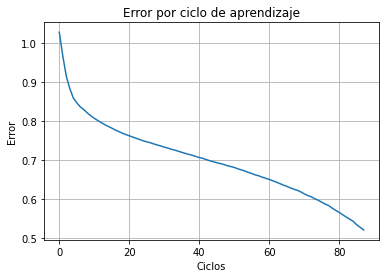

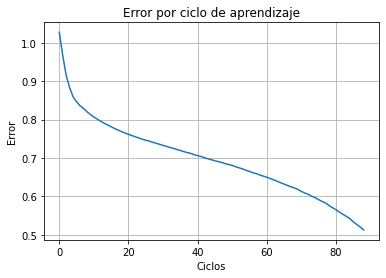

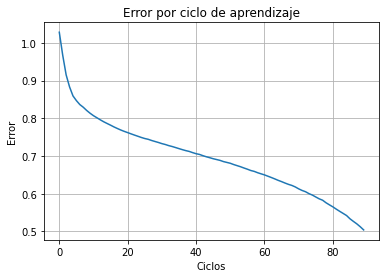

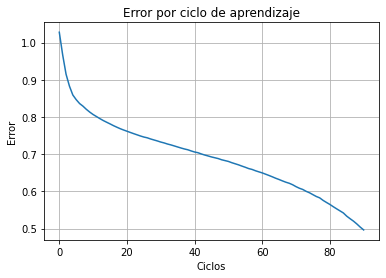

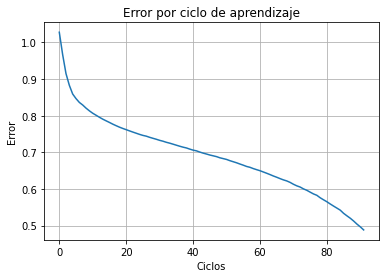

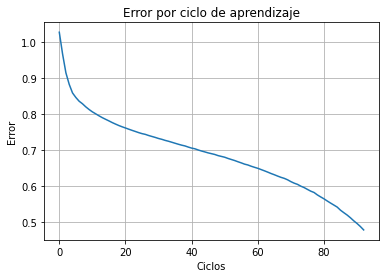

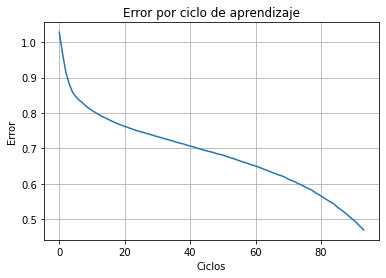

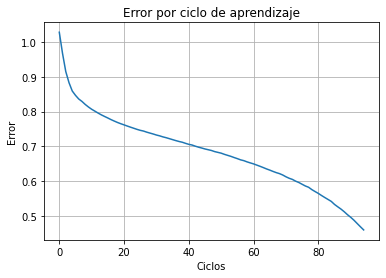

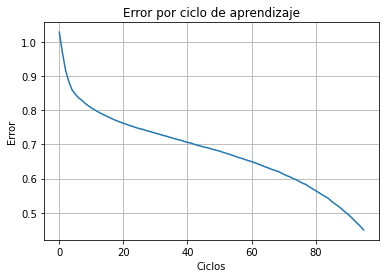

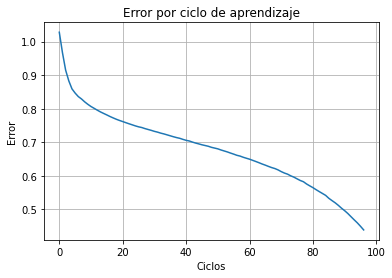

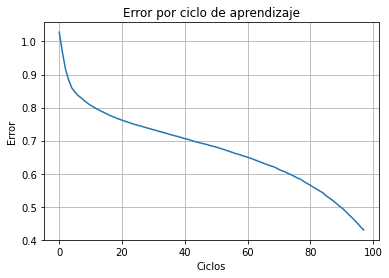

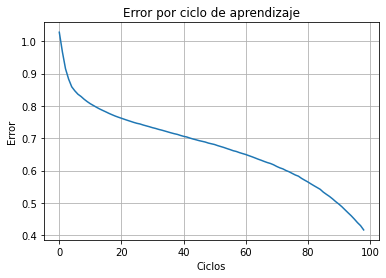

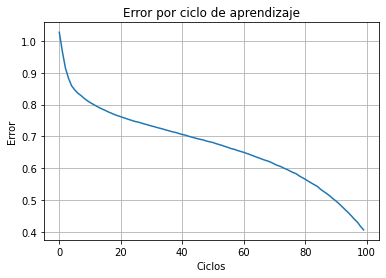

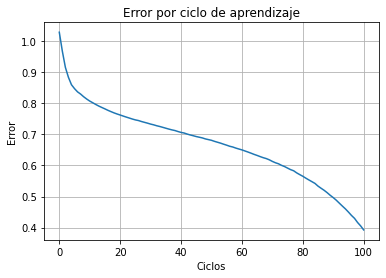

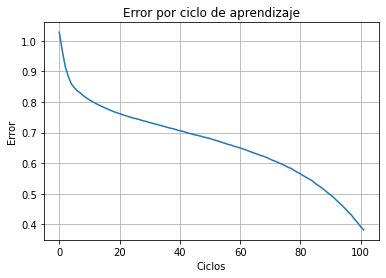

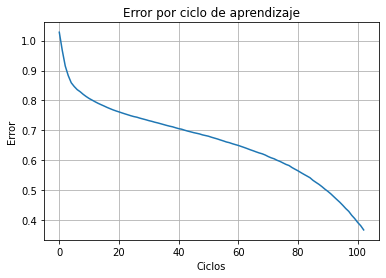

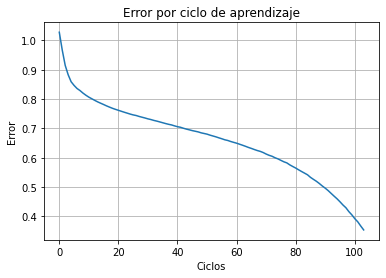

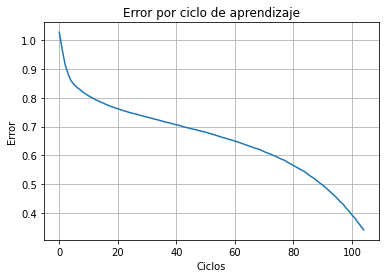

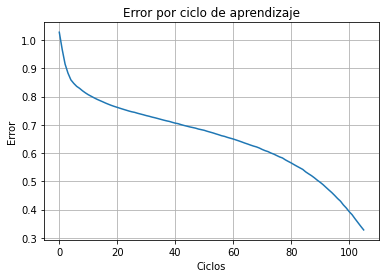

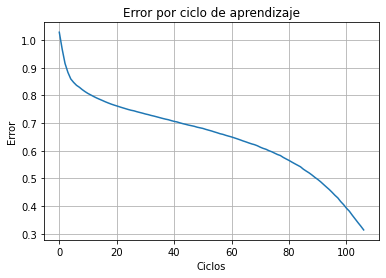

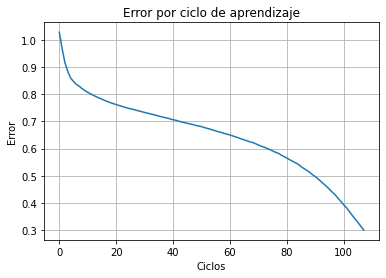

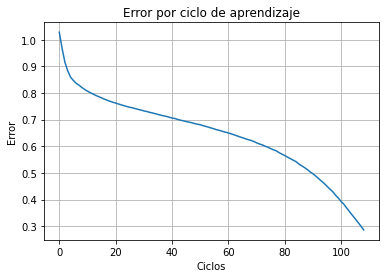

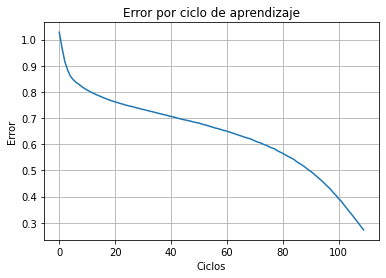

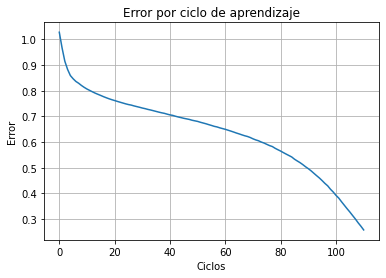

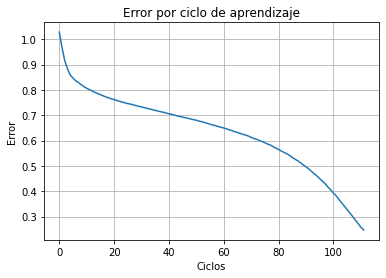

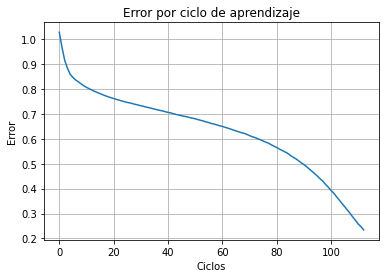

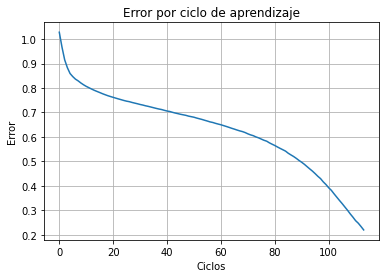

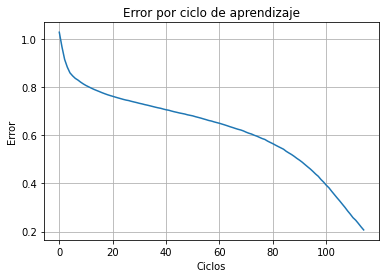

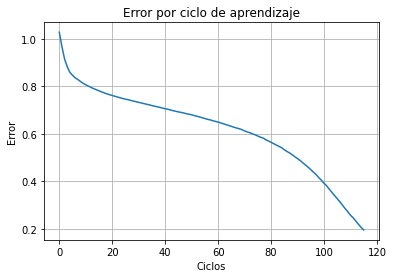

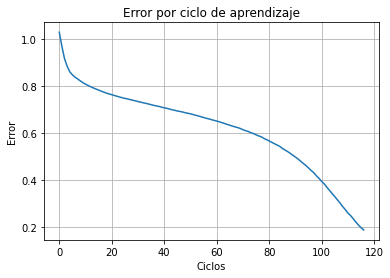

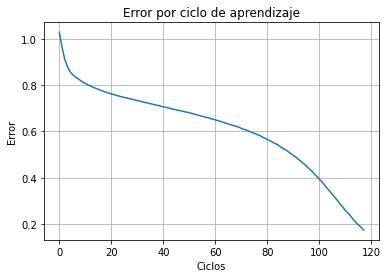

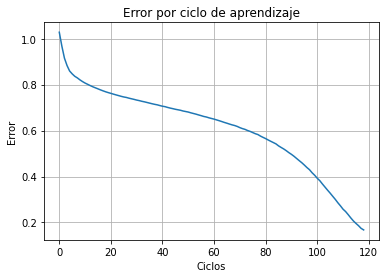

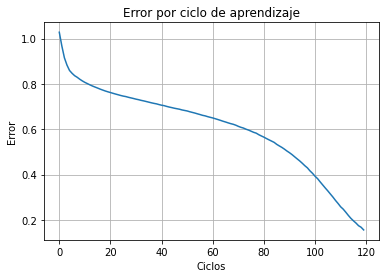

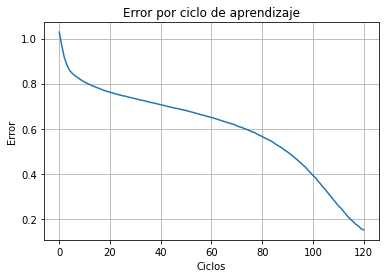

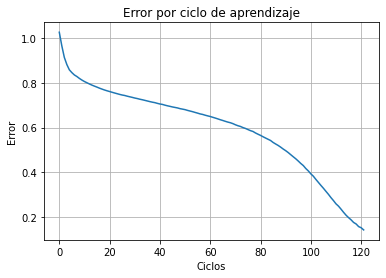

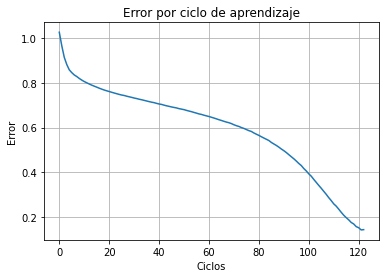

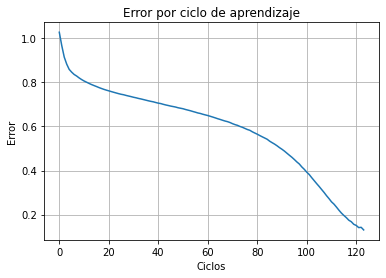

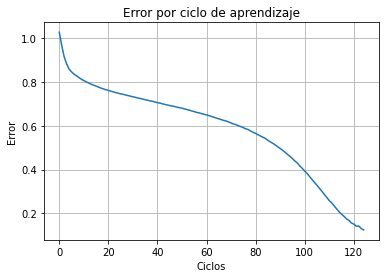

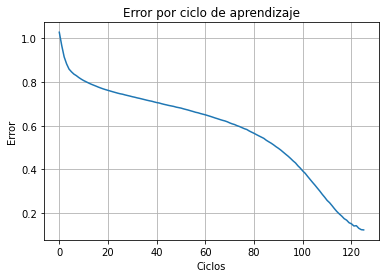

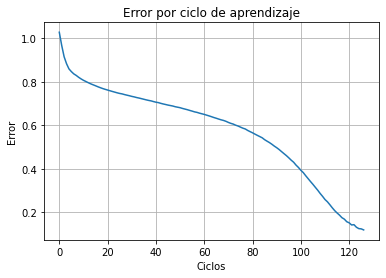

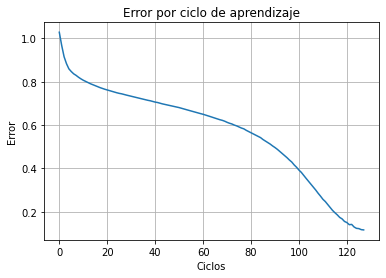

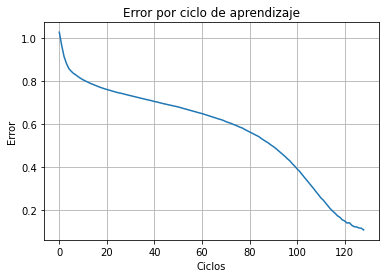

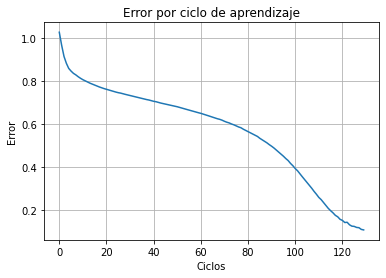

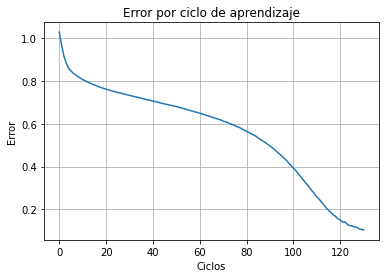

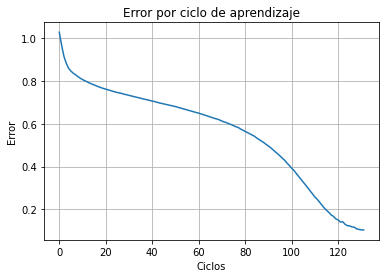

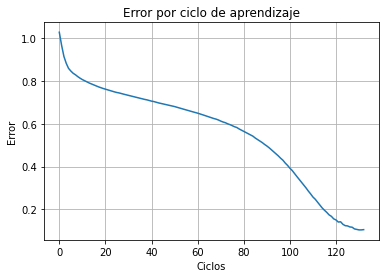

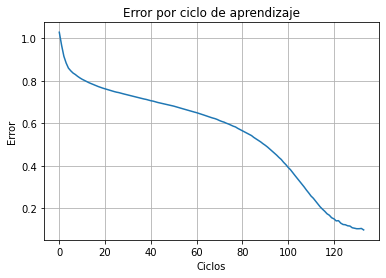

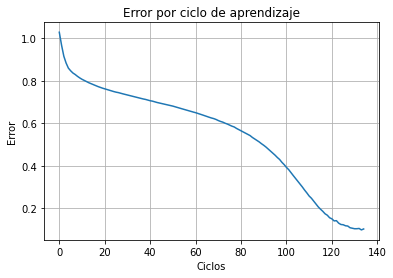

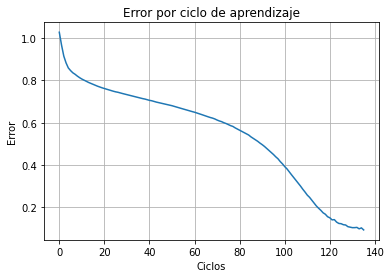

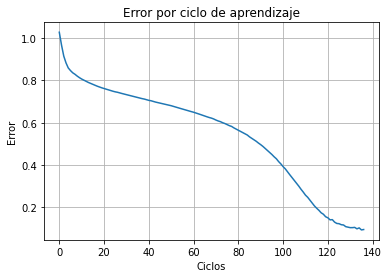

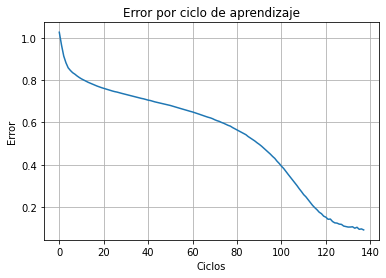

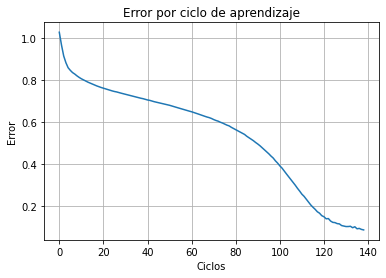

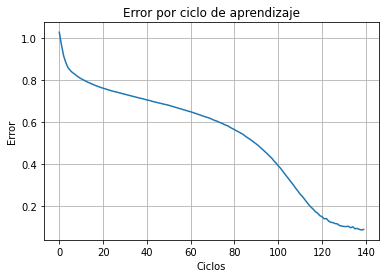

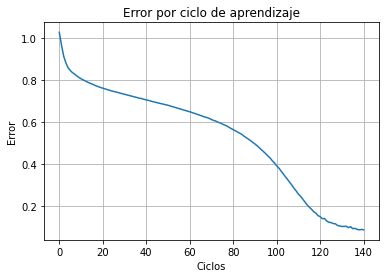

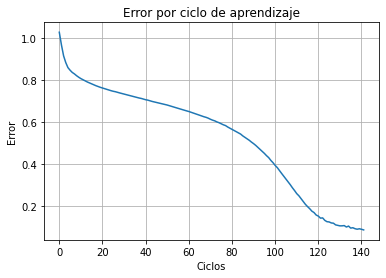

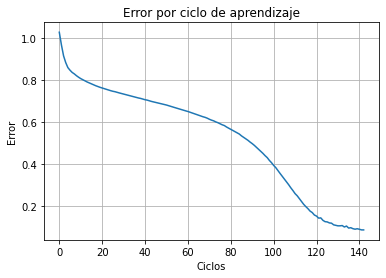

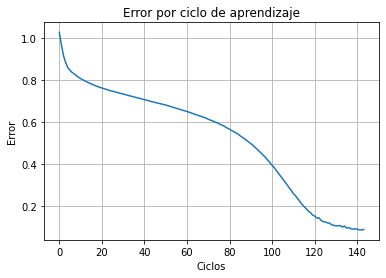

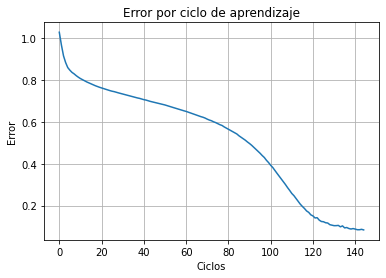

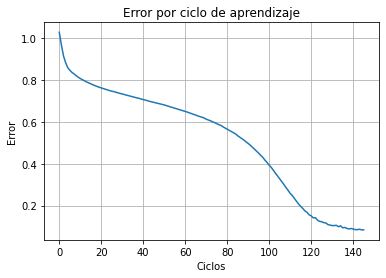

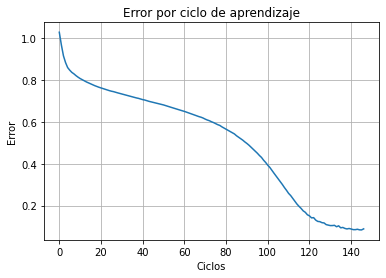

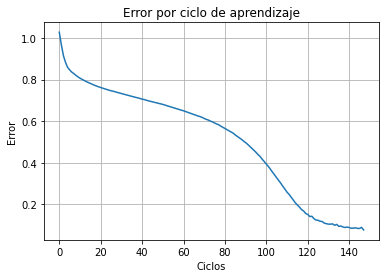

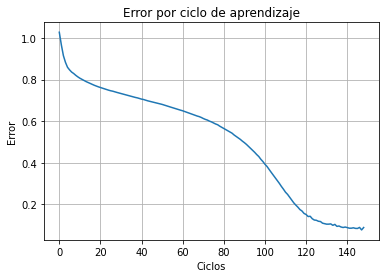

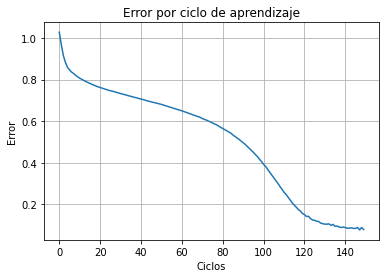

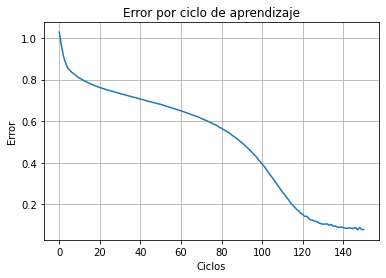

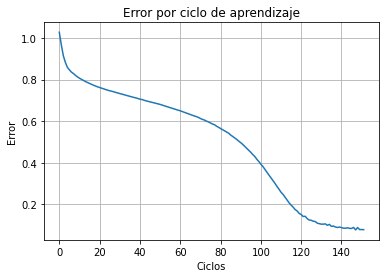

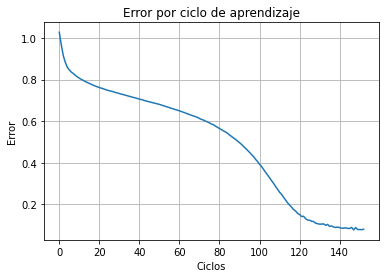

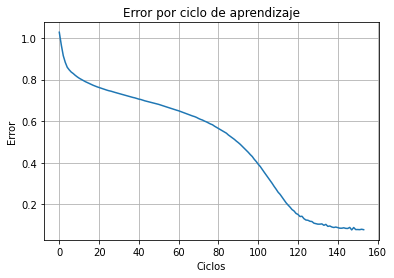

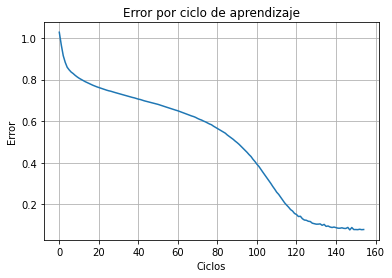

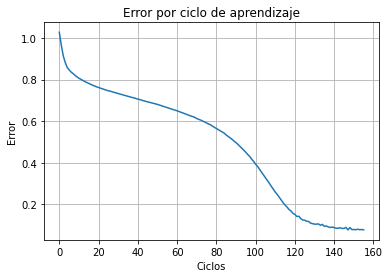

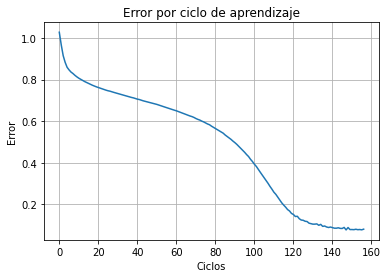

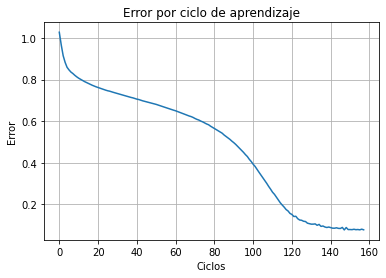

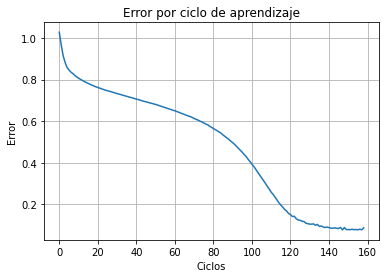

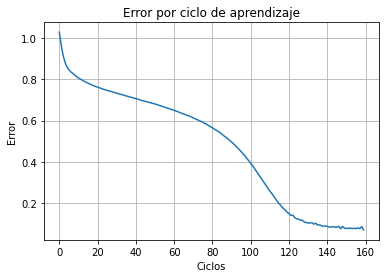

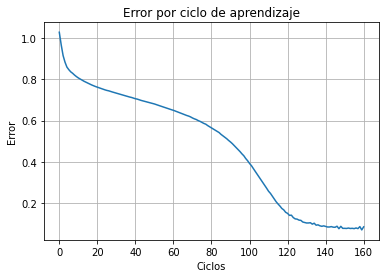

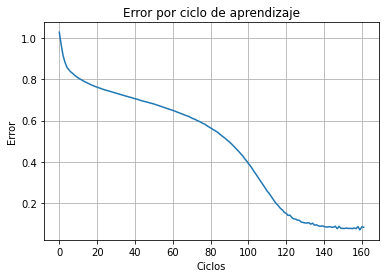

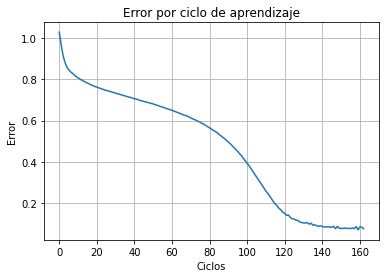

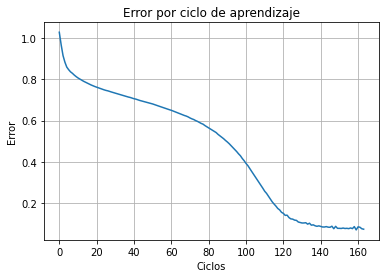

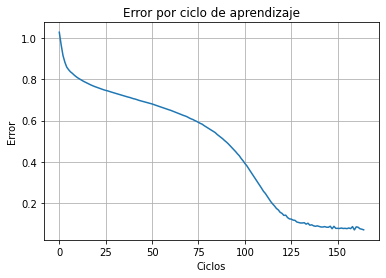

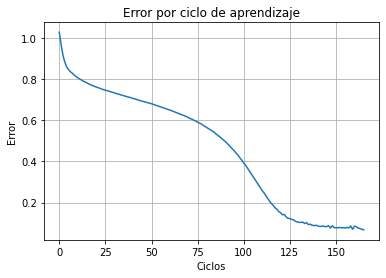

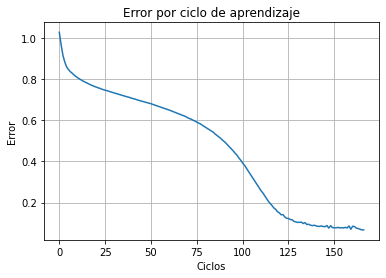

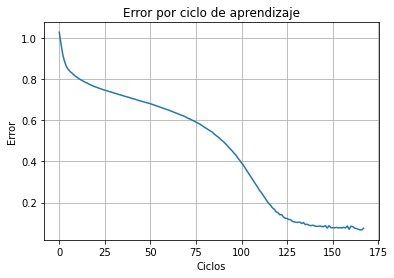

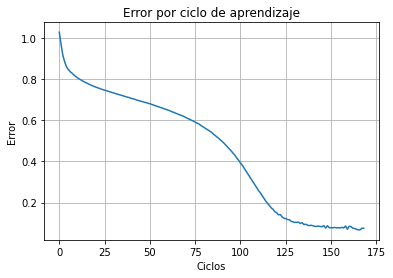

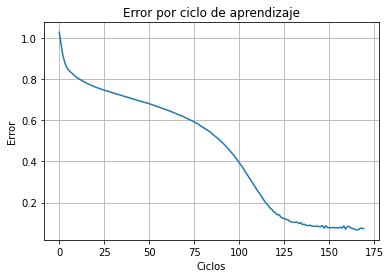

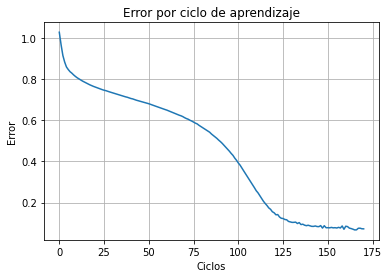

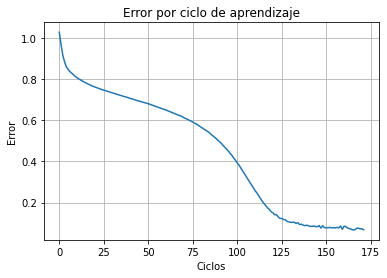

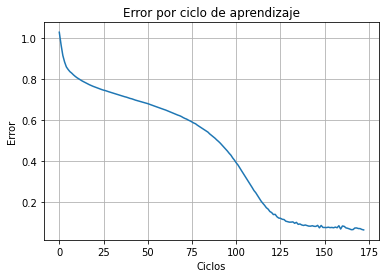

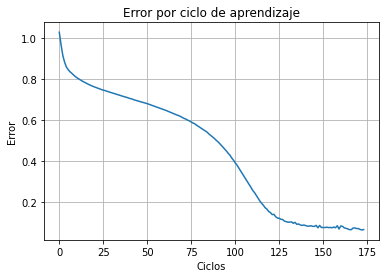

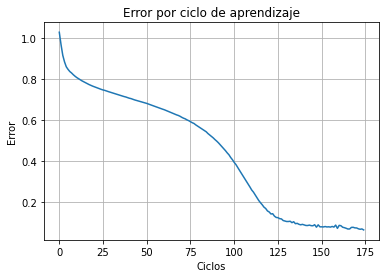

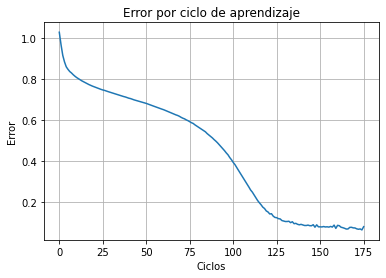

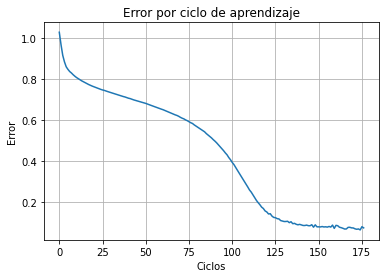

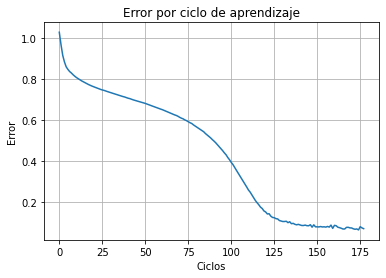

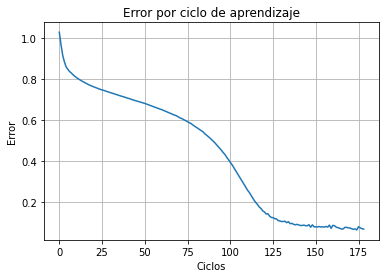

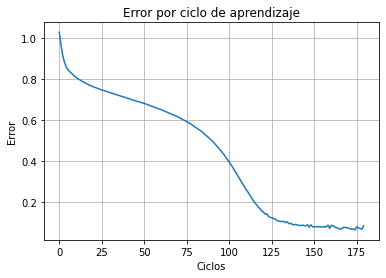

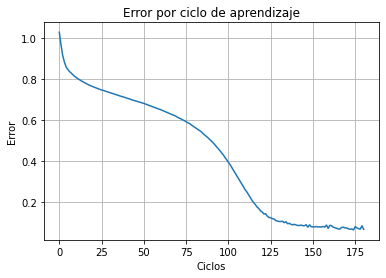

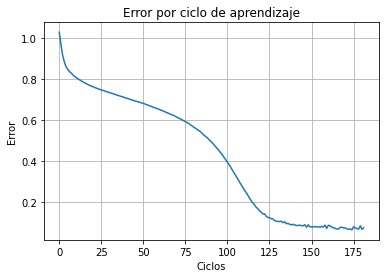

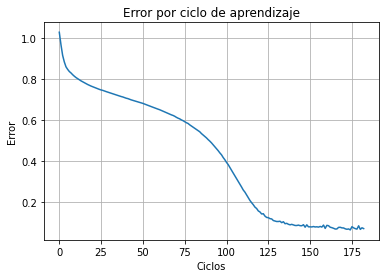

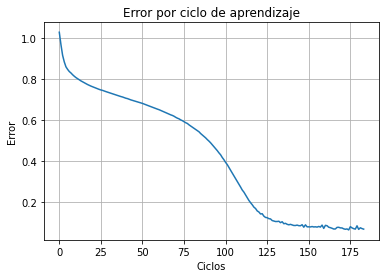

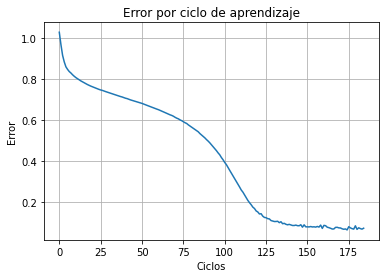

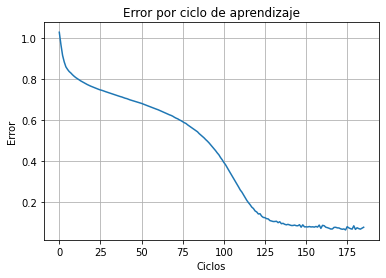

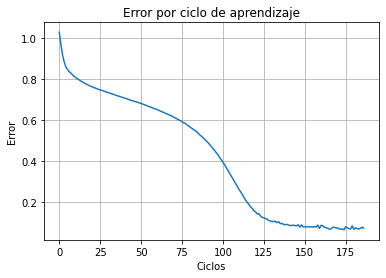

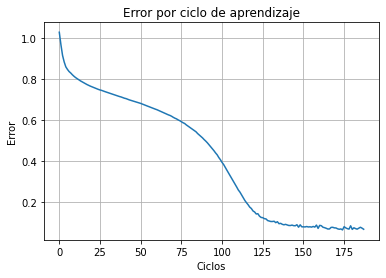

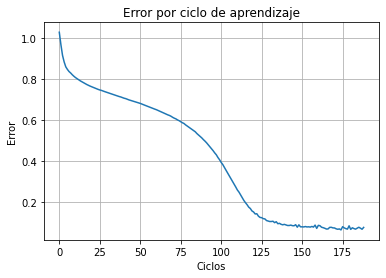

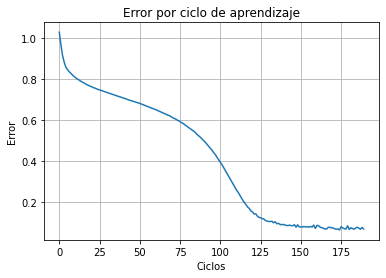

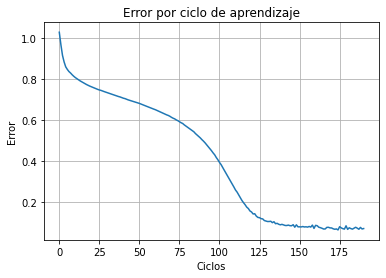

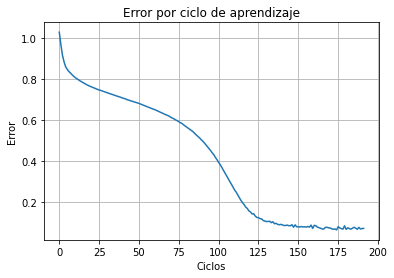

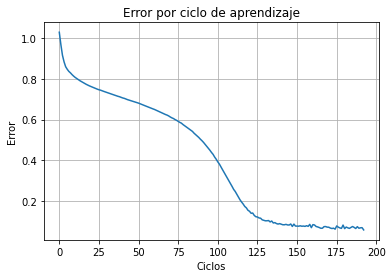

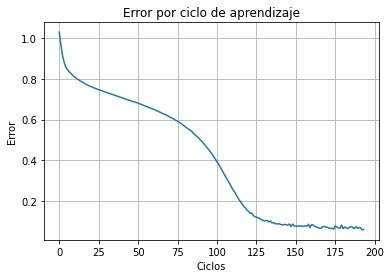

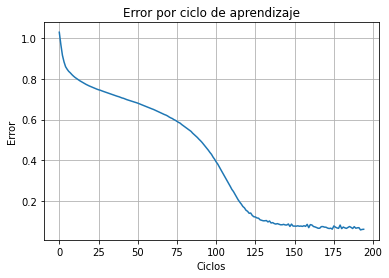

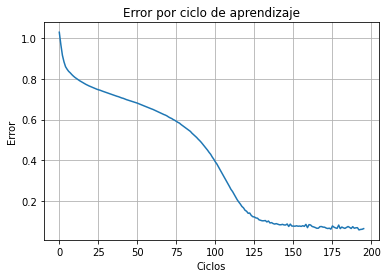

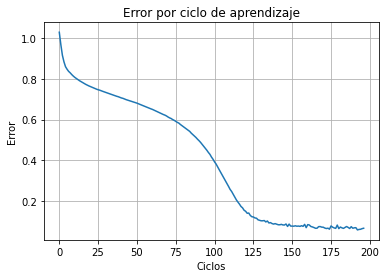

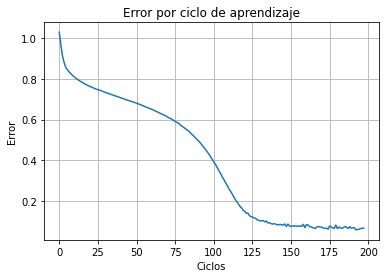

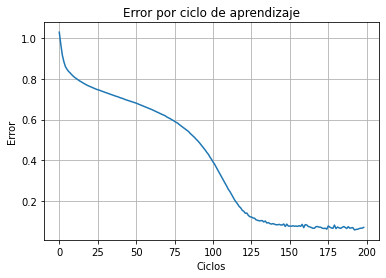

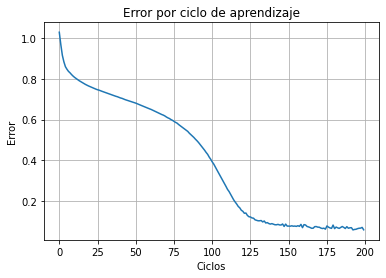

In [191]:
# Se entrena la red
error=[]
ciclos=10000
for i in range(ciclos):
    ind=np.random.randint(1,len(x_train),50)
    red.entrenamiento(x_train[ind,:],y_train[ind,:],0.0005)
    if i % 50==0:
        resultado=red.salida(x_train)
        error.append(np.mean((resultado-y_train)**2))
        plt.plot(range(len(error)),error)
        plt.title('Error por ciclo de aprendizaje')
        plt.xlabel('Ciclos')
        plt.ylabel('Error')
        #clear_output(wait=True)
        plt.grid()
        plt.show()        
        time.sleep(0.02)     

In [192]:
#Cantidad de desaciertos
error=0
for i in range(len(y_test)):
    if np.argmax(red.salida(x_test[i,:]))!=np.argmax(y_test[i,:]):
         error+=1            
print('Total de desaciertos: {0}'.format(error))

Total de desaciertos: 2779


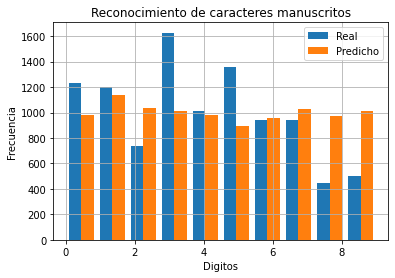

In [193]:
plt.hist([np.argmax(red.salida(x_test),axis=1),np.argmax(y_test,axis=1)])
plt.title('Reconocimiento de caracteres manuscritos')
plt.legend(["Real","Predicho"])
plt.xlabel('Digitos')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()            

In [195]:
print('Porcentaje de aciertos: {:.2f}%'.format(((len(x_test)-error)/len(x_test))*100))

Porcentaje de aciertos: 72.21%


In [285]:
imagen = plt.imread('datos/cuatro.jpg')

In [286]:
imagen.shape

(28, 28, 3)

In [287]:
imagen = imagen[:,:,0]

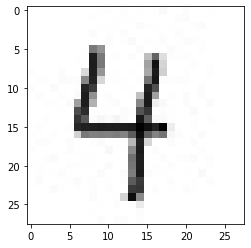

In [292]:
plt.imshow(imagen,cmap='binary_r');

In [280]:
imagen = 1-imagen/255

In [281]:
imagen = imagen.reshape(1,28*28)

In [282]:
np.argmax(red.salida(imagen))

4